In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=load_boston()
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
X=pd.DataFrame(data.data,columns=data.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y=pd.DataFrame(data.target)
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [22]:
gbr=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1)

In [23]:
gbr.fit(X_train,y_train)
gbr.score(X_test,y_test)

C:\Users\Sathwik\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7053855703207519

In [28]:
predicted=gbr.predict(X_test)
r2_score(y_test,predicted)

0.7053855703207519

In [29]:
impt_feat=gbr.feature_importances_
impt_feat

array([0.03076099, 0.        , 0.        , 0.        , 0.        ,
       0.66507295, 0.        , 0.06750832, 0.        , 0.        ,
       0.        , 0.        , 0.23665774])

In [30]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [40]:
req=zip(data.feature_names,gbr.feature_importances_)
ans=[]
for i in req:
    ans.append(i)
ans.sort(key=lambda item:-item[1])
ans

[('RM', 0.665072946079162),
 ('LSTAT', 0.23665774444786167),
 ('DIS', 0.0675083167343309),
 ('CRIM', 0.03076099273864534),
 ('ZN', 0.0),
 ('INDUS', 0.0),
 ('CHAS', 0.0),
 ('NOX', 0.0),
 ('AGE', 0.0),
 ('RAD', 0.0),
 ('TAX', 0.0),
 ('PTRATIO', 0.0),
 ('B', 0.0)]

<BarContainer object of 13 artists>

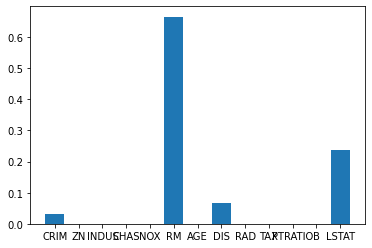

In [44]:
plt.bar(data.feature_names,gbr.feature_importances_)

In [45]:
from sklearn.model_selection import GridSearchCV

In [55]:
lr={"learning_rate":[0.1,0.25,0.3,0.5,0.75,0.9,1],"n_estimators":[100,150,200,250]}

In [56]:
tuning=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=lr,scoring="r2")

In [57]:
tuning.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.25, 0.3, 0.5, 0.75, 0.9, 1],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='r2')

In [59]:
tuning.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [60]:
gbr=GradientBoostingRegressor( learning_rate=0.1,
    n_estimators=200)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=200)

In [61]:
gbr.score(X_test,y_test)

0.9165438045566274